Detección de caras con Cascadas de Haar

Creación de un script básico para la detección de caras

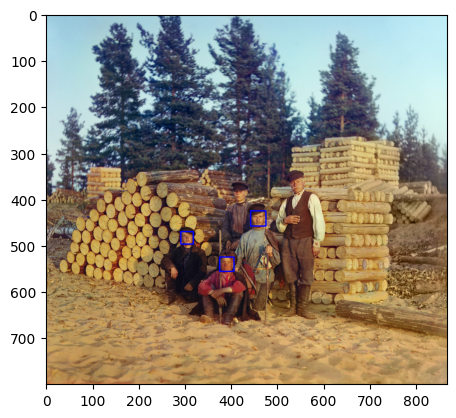

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


face_cascade = cv2.CascadeClassifier(
    './cascades/haarcascade_frontalface_default.xml')
img = cv2.imread('img/woodcutters.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.08, 5)
for (x, y, w, h) in faces:
    img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

#Convertir imagen a RGB para que se muestre correctamente en matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  
plt.imshow(img)

A continuación vamos a realizar el reconocimiento de caras pero en video. Atención! En el Notebook de jupiter funciona, pero una vez que paremos la ejecución de la celda es muy probable que nos crashee el kernel de python, por ello sería más recomendable hacerlo en un archivo .py.

In [ ]:
face_cascade = cv2.CascadeClassifier(
    './cascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(
    './cascades/haarcascade_eye.xml')

camera = cv2.VideoCapture(0)
while (cv2.waitKey(1) == -1):
    success, frame = camera.read()
    if success:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(
            gray, 1.3, 5, minSize=(120, 120))
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
            roi_gray = gray[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(
                roi_gray, 1.03, 5, minSize=(40, 40))
            for (ex, ey, ew, eh) in eyes:
                cv2.rectangle(frame, (x+ex, y+ey),
                              (x+ex+ew, y+ey+eh), (0, 255, 0), 2)
        cv2.imshow('Face Detection', frame)